In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import math

%matplotlib inline

cities = pd.read_csv('cities.csv')

cities = cities[cities['Population']>1e6]
def coord(deg,min,sec):
    return deg + min/60 + sec/3600

c = cities.drop(columns=['Longitude deg','Longitude min','Longitude sec','Latitude deg','Latitude min','Latitude sec'])
# print(c)
lat = coord(cities['Longitude deg'],cities['Longitude min'],cities['Longitude sec'])
lon = coord(cities['Latitude deg'],cities['Latitude min'],cities['Latitude sec'])
c['coord1'],c['coord2'] = [lat,lon]



print(c)

    Population     Country  Capital            Name     coord1      coord2
0     12506468      Russia        1          Moscow  55.755833   37.617778
1      8405837         USA        0        New York  40.728333  -73.994167
3      3976322         USA        0     Los Angeles  34.033333 -118.266667
5      4529500   Australia        0       Melbourne -37.820556  144.961389
6      5128590       Chile        1        Santiago -33.450000  -70.666667
7     21705000       China        1         Beijing  39.933333  116.400000
8     24152700       China        0        Shanghai  31.166667  121.466667
9     14000000       China        0       Guangzhou  23.127500  113.247222
10     6970105  Bangladesh        1           Dhaka  23.700000   90.366667
11    23500000    Pakistan        0         Karachi  24.860000   67.010000
12     6476631      Brasil        1  Rio de Janeiro -22.908333  -43.196389


In [43]:
def coord(dat):
    lat = dat['Longitude deg'] + dat['Longitude min']/60 + dat['Longitude sec']/3600
    lon = dat['Latitude deg'] + dat['Latitude min']/60 + dat['Latitude sec']/3600
    return lat,lon

def merc(coord,width, height):
    r = width/2/math.pi
    lat, lon = coord
    def merc_x(lon):
        return width/2 + r * math.radians(lon)
    
    def merc_y(lat):
        phi = math.radians(lat)
        return height/2 - r * math.atanh(math.sin(phi))
    
    return merc_x(lon),merc_y(lat)

Moscow (55.755833333333335, 37.617777777777775)
New York (40.72833333333333, -73.99416666666667)
Washington (38.894999999999996, -77.03666666666666)
Los Angeles (34.03333333333333, -118.26666666666667)
Canberra (-35.30277777777778, 149.14166666666665)
Melbourne (-37.82055555555556, 144.96138888888888)
Santiago (-33.45, -70.66666666666667)
Beijing (39.93333333333333, 116.4)
Shanghai (31.166666666666668, 121.46666666666667)
Guangzhou (23.1275, 113.24722222222222)
Dhaka (23.7, 90.36666666666666)
Karachi (24.860000000000003, 67.01)
Rio de Janeiro (-22.90833333333333, -43.19638888888888)


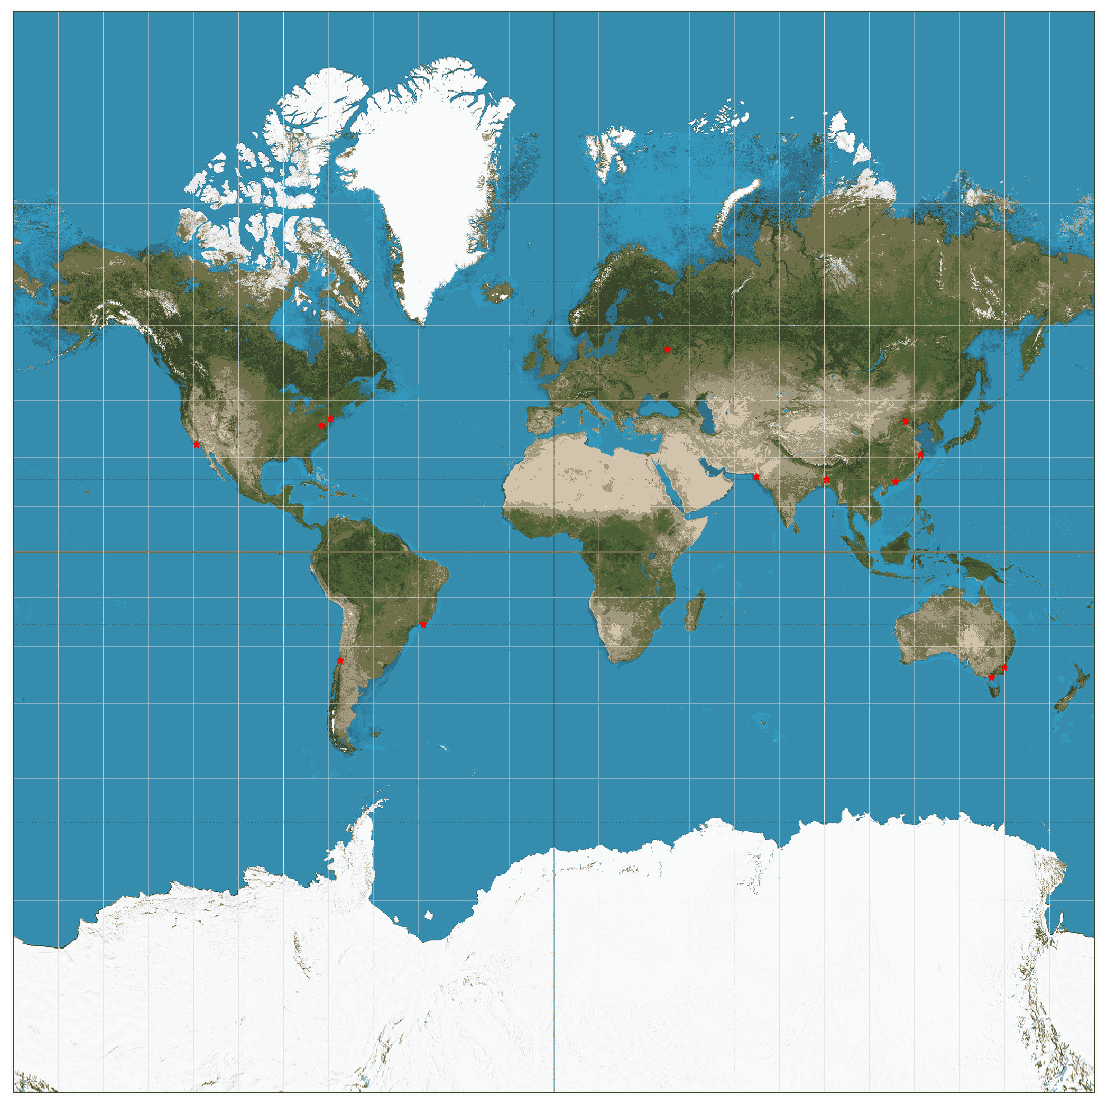

In [44]:
# wmap = mpimg.imread('contour_political_map_mercator.png')
wmap = mpimg.imread('Mercator_projection_Square.png')
height,width,c = wmap.shape
# plt.figure(figsize=(23.8,19.8),dpi=130)
fig,ax = plt.subplots(figsize=(15,15),dpi=96)
ax.imshow(wmap)
ax.axis('off')
# ax.plot([width//2,width//2], [0,height], 'r', lw=0.5) # 0 меридиан
# ax.plot( [0,width],[height//2,height//2], 'r', lw=0.5) # экватор

# ax.set_xlim(0,width)
# ax.set_ylim(height,0)

# print(merc(59.9311,30.3609,width, height))
# print(width//2+w_corr, height//2+h_corr)
for i, city in cities.iterrows():
    # print(city['Name'],coord(city))
    ax.plot(*merc(coord(city),width, height), 'r*', markersize=5)
# ax.plot(*merc(0,0,width, height), 'r*', markersize=5)
# merc(0,0,width-5, height-144)

plt.savefig('books_read.png')
# plt.show()

